In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse
import minimizer

from mathtools import factorized_hidden_expectation, hidden_expectations
from mathtools import gradient_log_theta, gradient_log_theta_phaseI #, gradient_log_theta_phaseI_NEW


In [2]:
# Generate input grid
X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))

# E(h_i|v) diagonal Q

# Linear periodicity relation tests

In [3]:
Q = np.diag([13])

X = np.linspace(-1000,1000, 100)
X = X.reshape((1,X.shape[0]))

#print(gradient_log_theta_phaseI(X.T -Q*60, Q, 0))

#print(gradient_log_theta(X.T, Q, 0)+60)

print(gradient_log_theta(X.T, Q, 0))

print(gradient_log_theta_phaseI(X.T, Q, 0))


[ 76.99648264 +4.71467480e-15j  75.15419439 +4.60186718e-15j
  73.98376841 +4.53019926e-15j  72.04280789 +4.41134970e-15j
  70.93658202 +4.34361291e-15j  69.01067227 +4.22568495e-15j
  67.78380464 +4.15056097e-15j  66.00185755 +4.04144818e-15j
  64.47105279 +3.94771342e-15j  62.99726714 +3.85747008e-15j
  61.17942736 +3.74615949e-15j  59.98647927 +3.67311249e-15j
  58.05092650 +3.55459407e-15j  56.94657308 +3.48697192e-15j
  55.01284718 +3.36856536e-15j  53.81302586 +3.29509749e-15j
  52.00253184 +3.18423671e-15j  50.51646025 +3.09324107e-15j
  48.99796216 +3.00025988e-15j  47.20777375 +2.89064245e-15j
  45.98876059 +2.81599942e-15j  44.06048137 +2.69792637e-15j
  42.95506986 +2.63023944e-15j  41.01543107 +2.51147082e-15j
  39.83910985 +2.43944192e-15j  38.00328907 +2.32703032e-15j
  36.56158427 +2.23875136e-15j  34.99859037 +2.14304558e-15j
  33.23929106 +2.03531957e-15j  31.99068238 +1.95886434e-15j
  30.07168848 +1.84135985e-15j  28.96227431 +1.77342783e-15j
  27.01850236 +1.6544061

In [4]:
Q = np.zeros((2,2))
Q[0,0] = 1.5
Q[1,0] = -1.4
Q[0,1] = 1.4
Q[1,1] = 1.7


X1 = np.linspace(-60,60, 21)
X2 = np.linspace(-60,65, 21)

X=np.stack((X1,X2))

print(gradient_log_theta(X.T, Q, 0))
#gradient_log_theta_phaseI_NEW(X.T, Q, 0)

[ 3.99112555 +2.44385957e-16j  3.66962122 +2.24699494e-16j
  3.34812326 +2.05013422e-16j  3.02659776 +1.85325663e-16j
  2.70510610 +1.65639976e-16j  2.38359257 +1.45952950e-16j
  2.06207713 +1.26265808e-16j  1.74058635 +1.06580175e-16j
  1.41906147 +8.68924546e-17j  1.09756173 +6.72062730e-17j
  0.77605938 +4.75199316e-17j  0.45453570 +2.78322847e-17j
  0.13304577 +8.14670394e-18j -0.18847211 +1.15405883e-17j
 -0.50998292 +3.12274476e-17j -0.83147611 +5.09132276e-17j
 -1.15300210 +7.06010166e-17j -1.47449781 +9.02869512e-17j
 -1.79600493 +1.09973585e-16j -2.11752568 +1.29661052e-16j
 -2.43901512 +1.49346603e-16j]


In [5]:
Q = np.zeros((2,2))
Q[0,0] = 2
Q[1,0] = 0.13
Q[0,1] = 0.14
Q[1,1] = 1


X1 = np.linspace(-100,100, 100)
X2 = np.linspace(-100,100, 100)


X=np.stack((X1,X2))

n=np.zeros((2,1))
n[0,0]=2
n[1,0]=2

R=np.repeat(Q.dot(n),X.shape[1],axis=1)

R.shape
print(gradient_log_theta(X.T, Q, 0))
print(gradient_log_theta(X.T-R.T, Q, 0))-2


[ 43.39470874 +2.65715956e-15j  42.51826354 +2.60349277e-15j
  41.64179863 +2.54982477e-15j  40.76520000 +2.49614858e-15j
  39.88843009 +2.44246191e-15j  39.01154907 +2.38876843e-15j
  38.13468055 +2.33507572e-15j  37.25794102 +2.28139091e-15j
  36.38137334 +2.22771662e-15j  35.50492224 +2.17404947e-15j
  34.62846578 +2.12038199e-15j  33.75188518 +2.06670691e-15j
  32.87513252 +2.01302129e-15j  31.99825814 +1.95932822e-15j
  31.12138188 +1.90563504e-15j  30.24462464 +1.85194914e-15j
  29.36803939 +1.79827377e-15j  28.49158089 +1.74460617e-15j
  27.61513144 +1.69093912e-15j  26.73856824 +1.63726510e-15j
  25.86183343 +1.58358058e-15j  24.98496718 +1.52988800e-15j
  24.10808467 +1.47619444e-15j  23.23131038 +1.42250749e-15j
  22.35470700 +1.36883102e-15j  21.47823967 +1.31516287e-15j
  20.60179573 +1.26149616e-15j  19.72524921 +1.20782317e-15j
  18.84853274 +1.15413976e-15j  17.97167601 +1.10044778e-15j
  17.09478878 +1.04675392e-15j  16.21799820 +9.93065979e-16j
  15.34137629 +9.3938836

# Phase I

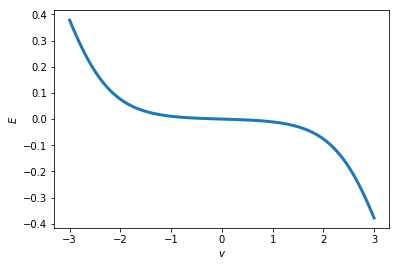

In [6]:
# Setup and plot expectation
Q = np.diag([13])
B = np.zeros((1,1))
B[0,0] = 0
W = np.zeros((1,1))
W[0,0] = 2

X = np.linspace(-3,3, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q, True)

#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

#plt.savefig("EhvPhaseI-1.eps", format="eps")

In [7]:
E

array([[  3.77537991e-01 +3.81148053e-17j,
          3.49778189e-01 +3.98146030e-17j,
          3.23000249e-01 +4.14542789e-17j,
          2.97334761e-01 +4.30258368e-17j,
          2.72886441e-01 +4.45228646e-17j,
          2.49733715e-01 +4.59405602e-17j,
          2.27929344e-01 +4.72756929e-17j,
          2.07501921e-01 +4.85265118e-17j,
          1.88458037e-01 +4.96926134e-17j,
          1.70784908e-01 +5.07747804e-17j,
          1.54453251e-01 +5.17748060e-17j,
          1.39420245e-01 +5.26953121e-17j,
          1.25632417e-01 +5.35395731e-17j,
          1.13028355e-01 +5.43113493e-17j,
          1.01541165e-01 +5.50147368e-17j,
          9.11006244e-02 +5.56540356e-17j,
          8.16350226e-02 +5.62336365e-17j,
          7.30726801e-02 +5.67579288e-17j,
          6.53431685e-02 +5.72312248e-17j,
          5.83782550e-02 +5.76577028e-17j,
          5.21126033e-02 +5.80413633e-17j,
          4.64842649e-02 +5.83859996e-17j,
          4.14349935e-02 +5.86951783e-17j,
          3

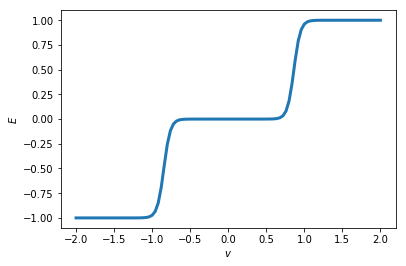

In [8]:
Q = np.diag([40])
B = np.zeros((1,1))
B[0,0] = 0.2
W = np.zeros((1,1))
W[0,0] = -0.18*130

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectation(X, B, W, Q)

plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

plt.savefig("EhvPhaseI-2.eps", format="eps")

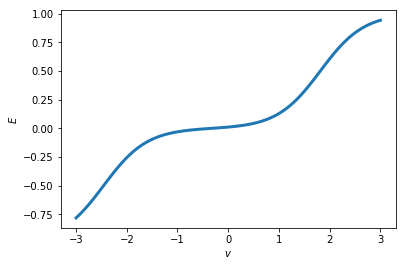

In [9]:
Q = np.diag([10])
B = np.zeros((1,1))
B[0,0] = -0.75
W = np.zeros((1,1))
W[0,0] = -0.18*13

X = np.linspace(-3,3, 101)
X = X.reshape((1,X.shape[0]))

E=factorized_hidden_expectation(X, B, W, Q)
plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')

plt.savefig("EhvPhaseI-3.eps", format="eps")

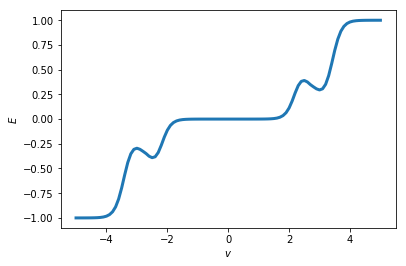

In [10]:
# Non-diagonal

Q = np.zeros((2,2))
Q[0,0] = 30
Q[1,0] = -7
Q[0,1] = -1
Q[1,1] = 38
B = np.zeros((1,2))
B[0,0] = 0
B[0,1] = 0
W = np.zeros((1,2))
W[0,0] = -5.4
W[0,1] = 8.2


X = np.linspace(-5,5, 101)
X = X.reshape((1,X.shape[0]))

E=hidden_expectations(X, B, W, Q)


plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), E[0],"-", linewidth='3')



# Phase II

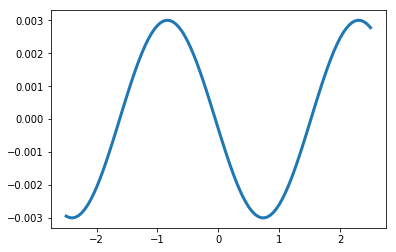

In [11]:
Q = np.diag([13])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0.1j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 2j

X = np.linspace(-2.5,2.5, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

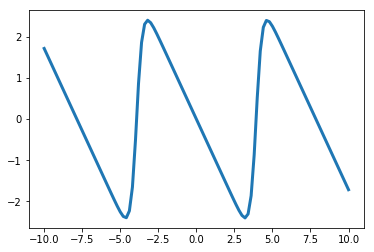

In [12]:
Q = np.diag([1])
B = np.zeros((1,1), dtype=complex)
B[0,0] = 0j
W = np.zeros((1,1), dtype=complex)
W[0,0] = 0.8j

X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

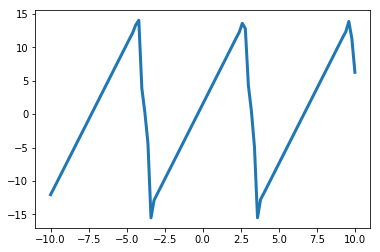

In [13]:
Q = np.diag([0.2])
B = np.zeros((1,1), dtype=complex)
B[0,0] = -0.3j
W = np.zeros((1,1), dtype=complex)
W[0,0] = -0.9j

X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))
E=factorized_hidden_expectation(X, B, W, Q)

plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')

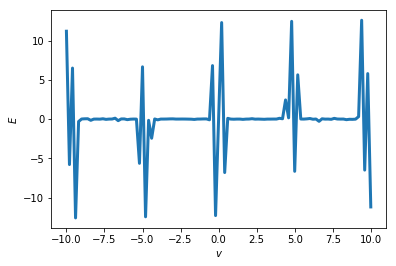

In [16]:
# Non-diagonal

Q = np.zeros((2,2))
Q[0,0] = 1.2
Q[1,0] = -0.1
Q[0,1] = -0.1
Q[1,1] = 0.01
B = np.zeros((1,2), dtype=complex)
B[0,0] = 0
B[0,1] = 0
W = np.zeros((1,2), dtype=complex)
W[0,0] = 0.7j
W[0,1] = -1.3j


X = np.linspace(-1,1, 101)
X = X.reshape((1,X.shape[0]))

E=hidden_expectations(X, B, W, Q)


plt.xlabel("$v$")
plt.ylabel("$E$")
plt.plot(X.flatten(), -1j*E[0],"-", linewidth='3')


In [15]:
# Note: Check non-vanishing real/im parts (ROUNDING ERROR ?)